In [76]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from sklearn import metrics



In [77]:
def simple_sin(x):
    return np.sin(x)

def inverterd_sin(x):
    return np.sin(x**(-1))

def singum(x):
    return np.sign(np.sin(8*x))

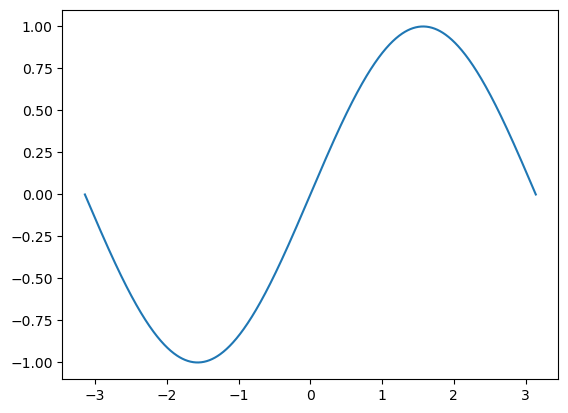

In [78]:
x=np.linspace(-np.pi, np.pi, 1000)
y_simple_sin=simple_sin(x)
line=plt.plot(x,y_simple_sin)

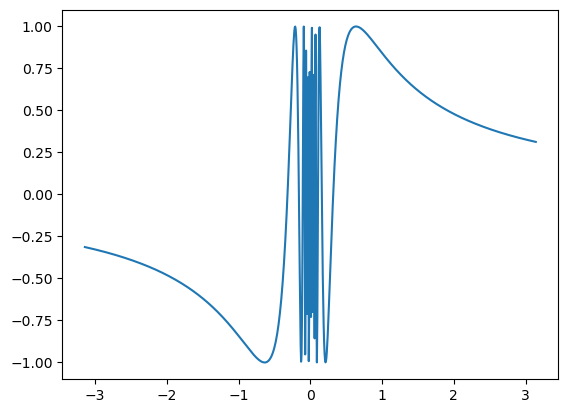

In [79]:
y_inverted_sin=inverterd_sin(x)
line=plt.plot(x,y_inverted_sin)

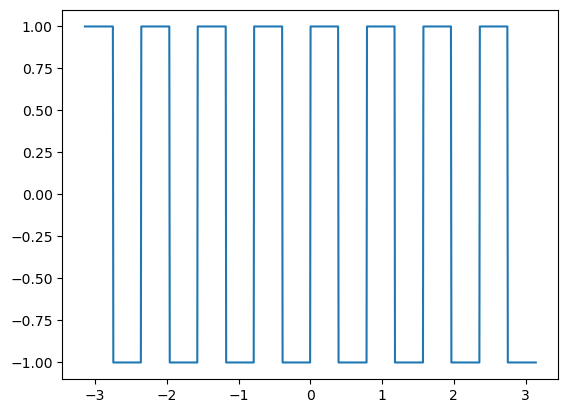

In [80]:
y_signum=singum(x)
line=plt.plot(x,y_signum)

MSE for 2*n predictions: 0.0000000674
MSE for 4*n predictions: 0.0000000674
MSE for 10*n predictions: 0.0000000675


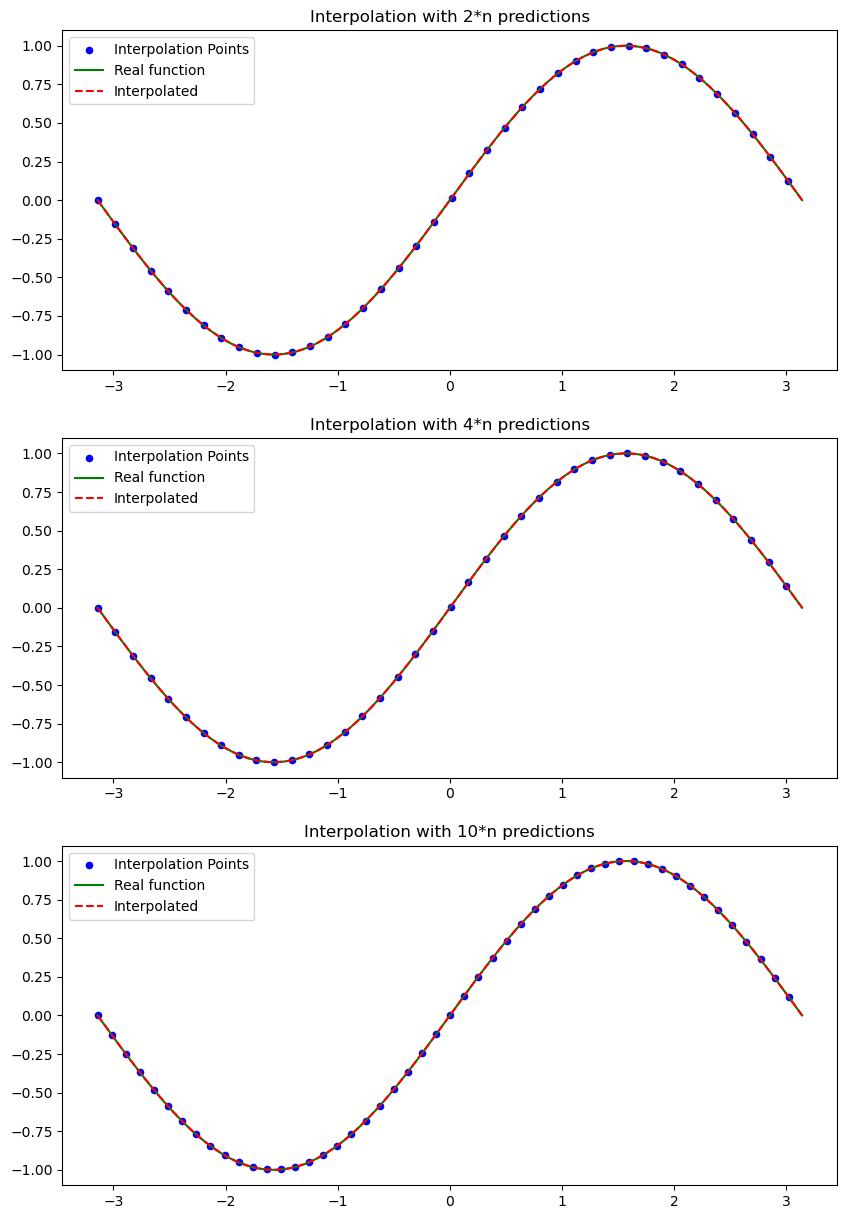

In [81]:
n_samples = 100
n2_predictions = 200
n4_predictions = 400
n10_predictions = 1000

x = np.linspace(-np.pi, np.pi, n_samples)
y = simple_sin(x)
    
x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)
y_n2_interp = np.interp(x_n2_interp, x, y)
y_n2_true = simple_sin(x_n2_interp)

x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)
y_n4_interp = np.interp(x_n4_interp, x, y)
y_n4_true = simple_sin(x_n4_interp)

x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)
y_n10_interp = np.interp(x_n10_interp, x, y)
y_n10_true = simple_sin(x_n10_interp)

print(f"MSE for 2*n predictions: {metrics.mean_squared_error(y_pred=y_n2_interp, y_true=y_n2_true):.10f}")
print(f"MSE for 4*n predictions: {metrics.mean_squared_error(y_pred=y_n4_interp, y_true=y_n4_true):.10f}")
print(f"MSE for 10*n predictions: {metrics.mean_squared_error(y_pred=y_n10_interp, y_true=y_n10_true):.10f}")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].scatter(x_n2_interp[::5], y_n2_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].plot(x_n2_interp, y_n2_true, label="Real function", color='green')
axs[0].plot(x_n2_interp, y_n2_interp, '--', label="Interpolated", color='red')
axs[0].set_title("Interpolation with 2*n predictions")
axs[0].legend()

axs[1].scatter(x_n4_interp[::10], y_n4_interp[::10], color='blue', label='Interpolation Points', s=20)
axs[1].plot(x_n4_interp, y_n4_true, label="Real function", color='green')
axs[1].plot(x_n4_interp, y_n4_interp, '--', label="Interpolated", color='red')
axs[1].set_title("Interpolation with 4*n predictions")
axs[1].legend()

axs[2].scatter(x_n10_interp[::20], y_n10_interp[::20], color='blue', label='Interpolation Points', s=20)
axs[2].plot(x_n10_interp, y_n10_true, label="Real function", color='green')
axs[2].plot(x_n10_interp, y_n10_interp, '--', label="Interpolated", color='red')
axs[2].set_title("Interpolation with 10*n predictions")
axs[2].legend()

MSE for 2*n predictions: 0.0360
MSE for 4*n predictions: 0.0440
MSE for 10*n predictions: 0.0381


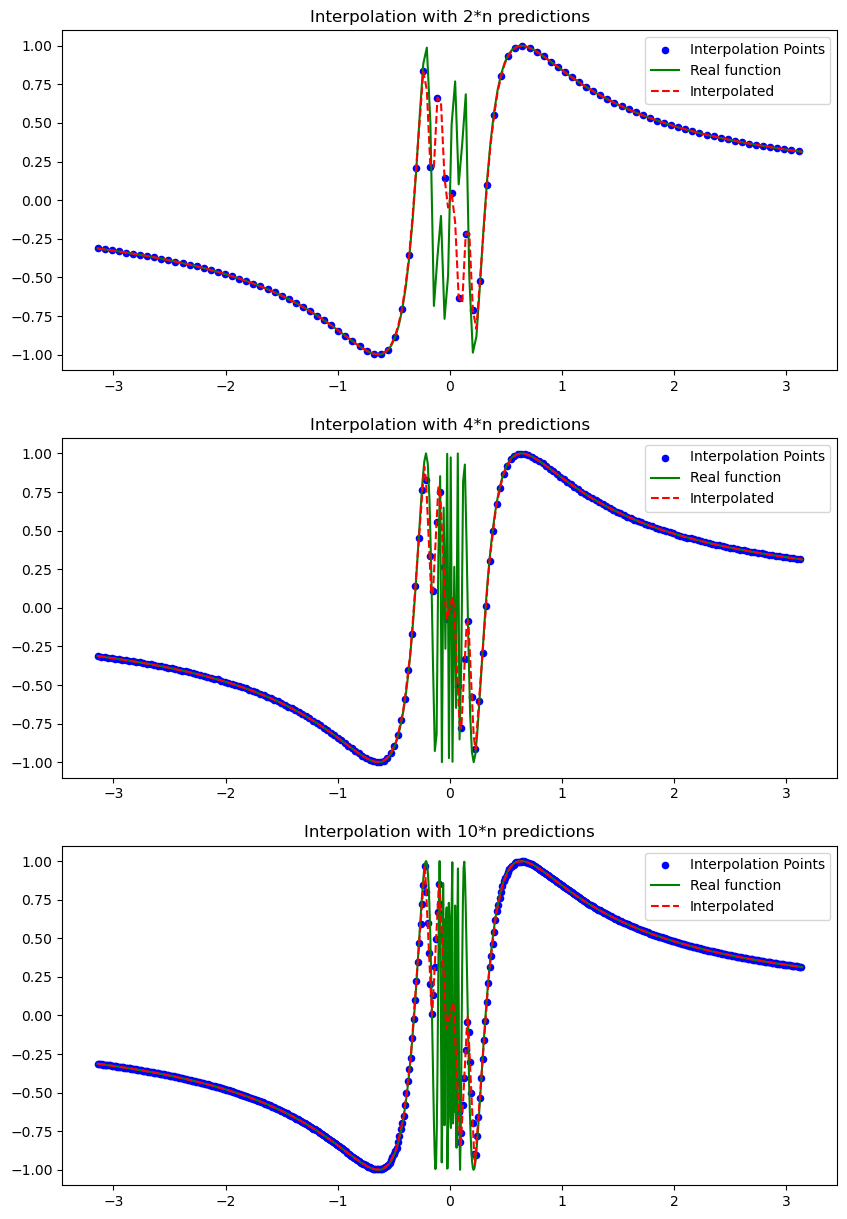

In [82]:
n_samples = 100
n2_predictions = 200
n4_predictions = 400
n10_predictions = 1000

x = np.linspace(-np.pi, np.pi, n_samples)
y = inverterd_sin(x)
    
x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)
y_n2_interp = np.interp(x_n2_interp, x, y)
y_n2_true = inverterd_sin(x_n2_interp)

x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)
y_n4_interp = np.interp(x_n4_interp, x, y)
y_n4_true = inverterd_sin(x_n4_interp)

x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)
y_n10_interp = np.interp(x_n10_interp, x, y)
y_n10_true = inverterd_sin(x_n10_interp)

print(f"MSE for 2*n predictions: {metrics.mean_squared_error(y_pred=y_n2_interp, y_true=y_n2_true):.4f}")
print(f"MSE for 4*n predictions: {metrics.mean_squared_error(y_pred=y_n4_interp, y_true=y_n4_true):.4f}")
print(f"MSE for 10*n predictions: {metrics.mean_squared_error(y_pred=y_n10_interp, y_true=y_n10_true):.4f}")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].scatter(x_n2_interp[::2], y_n2_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[0].plot(x_n2_interp, y_n2_true, label="Real function", color='green')
axs[0].plot(x_n2_interp, y_n2_interp, '--', label="Interpolated", color='red')
axs[0].set_title("Interpolation with 2*n predictions")
axs[0].legend()

axs[1].scatter(x_n4_interp[::2], y_n4_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[1].plot(x_n4_interp, y_n4_true, label="Real function", color='green')
axs[1].plot(x_n4_interp, y_n4_interp, '--', label="Interpolated", color='red')
axs[1].set_title("Interpolation with 4*n predictions")
axs[1].legend()

axs[2].scatter(x_n10_interp[::2], y_n10_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[2].plot(x_n10_interp, y_n10_true, label="Real function", color='green')
axs[2].plot(x_n10_interp, y_n10_interp, '--', label="Interpolated", color='red')
axs[2].set_title("Interpolation with 10*n predictions")
axs[2].legend()

MSE for 2*n predictions: 0.0989
MSE for 4*n predictions: 0.0972
MSE for 10*n predictions: 0.0958


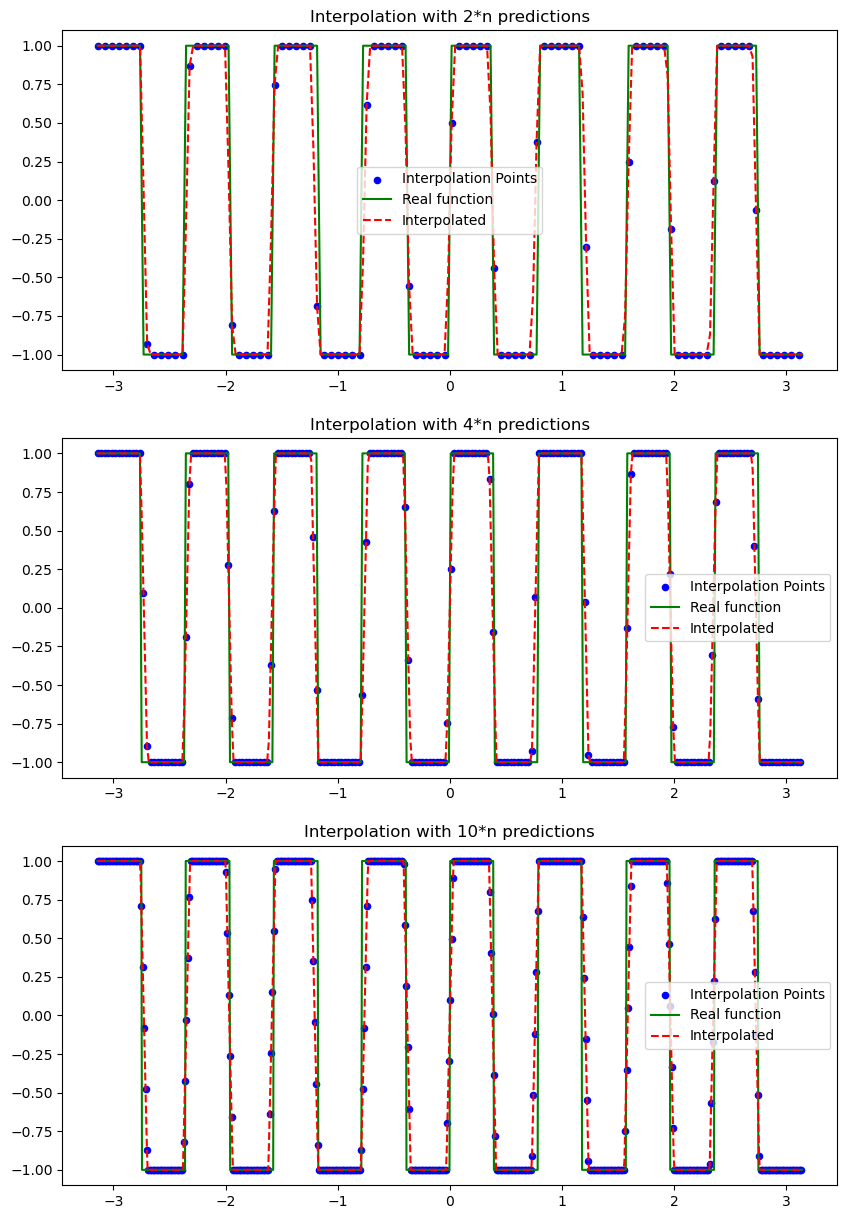

In [83]:
n_samples = 100
n2_predictions = 200
n4_predictions = 400
n10_predictions = 1000

x = np.linspace(-np.pi, np.pi, n_samples)
y = singum(x)
    
x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)
y_n2_interp = np.interp(x_n2_interp, x, y)
y_n2_true = singum(x_n2_interp)

x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)
y_n4_interp = np.interp(x_n4_interp, x, y)
y_n4_true = singum(x_n4_interp)

x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)
y_n10_interp = np.interp(x_n10_interp, x, y)
y_n10_true = singum(x_n10_interp)

print(f"MSE for 2*n predictions: {metrics.mean_squared_error(y_pred=y_n2_interp, y_true=y_n2_true):.4f}")
print(f"MSE for 4*n predictions: {metrics.mean_squared_error(y_pred=y_n4_interp, y_true=y_n4_true):.4f}")
print(f"MSE for 10*n predictions: {metrics.mean_squared_error(y_pred=y_n10_interp, y_true=y_n10_true):.4f}")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

#axs[0].plot(x, y, 'o', label="Measurements", color='blue')
axs[0].scatter(x_n2_interp[::2], y_n2_interp[::2], label="Interpolation Points", color='blue',s=20)
axs[0].plot(x_n2_interp, y_n2_true, label="Real function", color='green')
axs[0].plot(x_n2_interp, y_n2_interp, '--', label="Interpolated", color='red')
axs[0].set_title("Interpolation with 2*n predictions")
axs[0].legend()

#axs[1].plot(x, y, 'o', label="Measurements", color='blue')
axs[1].scatter(x_n4_interp[::2], y_n4_interp[::2], label="Interpolation Points", color='blue',s=20)
axs[1].plot(x_n4_interp, y_n4_true, label="Real function", color='green')
axs[1].plot(x_n4_interp, y_n4_interp, '--', label="Interpolated", color='red')
axs[1].set_title("Interpolation with 4*n predictions")
axs[1].legend()

axs[2].scatter(x_n10_interp[::2], y_n10_interp[::2], label="Interpolation Points", color='blue',s=20)
axs[2].plot(x_n10_interp, y_n10_true, label="Real function", color='green')
axs[2].plot(x_n10_interp, y_n10_interp, '--', label="Interpolated", color='red')
axs[2].set_title("Interpolation with 10*n predictions")
axs[2].legend()

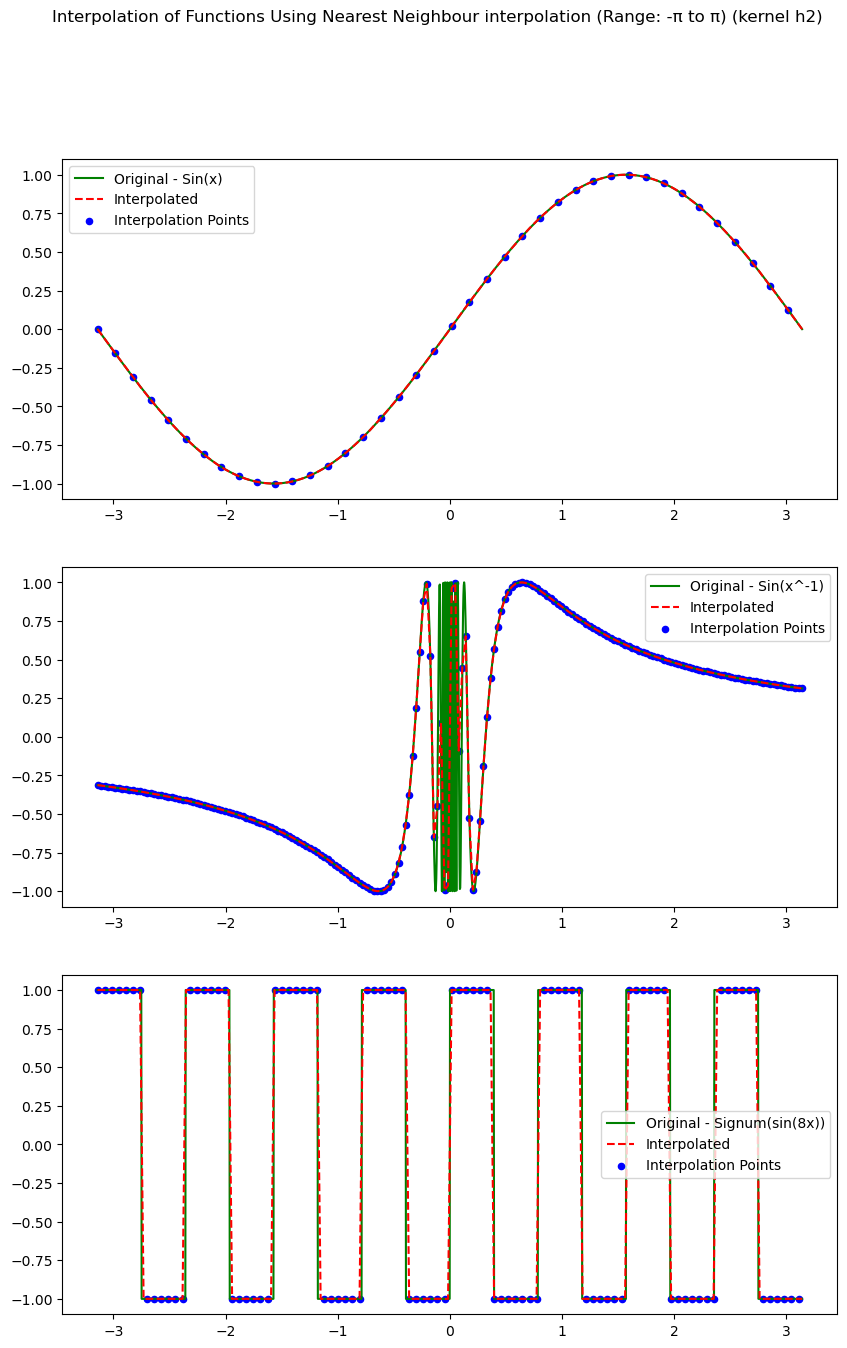

In [84]:

x = np.linspace(-np.pi, np.pi, 2000)
y_simple_sin=simple_sin(x)
y_inverted_sin=inverterd_sin(x)
y_signum=singum(x)

x_interp = np.linspace(-np.pi, np.pi, 200)

def nearest_neighbor_half_interval(x, y, x_interp):
    new_y = np.zeros_like(x_interp)
    for i, nx in enumerate(x_interp):
        distances = np.abs(x - nx)
        if np.any(distances <= 0.5):  
            closest_idx = np.argmin(distances)
            new_y[i] = y[closest_idx]
        else:
            new_y[i] = 0  
    return new_y

y_simple_sin_interp = nearest_neighbor_half_interval(x, y_simple_sin, x_interp)
y_inverted_sin_interp = nearest_neighbor_half_interval(x, y_inverted_sin, x_interp)
y_signum_interp = nearest_neighbor_half_interval(x, y_signum, x_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Nearest Neighbour interpolation (Range: -π to π) (kernel h2)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_interp[::5], y_simple_sin_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_interp[::1], y_inverted_sin_interp[::1] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_interp[::2], y_signum_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[2].legend()


In [85]:

def sinc_interpolate(x, y, x_interp):
    dx = x[1] - x[0]
    result = np.zeros_like(x_interp, dtype=float)
    for i in range(len(y)):
        result += y[i] * np.sinc((x_interp - x[i]) / dx)
    return result

In [86]:
def h1(x):
    return np.where((x >= 0) & (x <= 1), 1, 0)

def h2(x):
    return np.where((x>=-0.5)&(x<=0.5),1,0) 

def h3(x):
    return np.sinc(x/np.pi)

def linear_interpolation(x_values, y_values, x, kernel):
    n = len(x_values)
    interpolated_value = 0.0
    for i in range(n):
        weight = kernel(x - x_values[i])
        interpolated_value += weight * y_values[i]
    normalizer = sum(kernel(x - xi) for xi in x_values)
    if normalizer != 0:
        interpolated_value /= normalizer  
    return interpolated_value


MSE for kernel h1: 0.0866591891
MSE for kernel h2: 0.0032196351
MSE for kernel h3: 0.1997475951


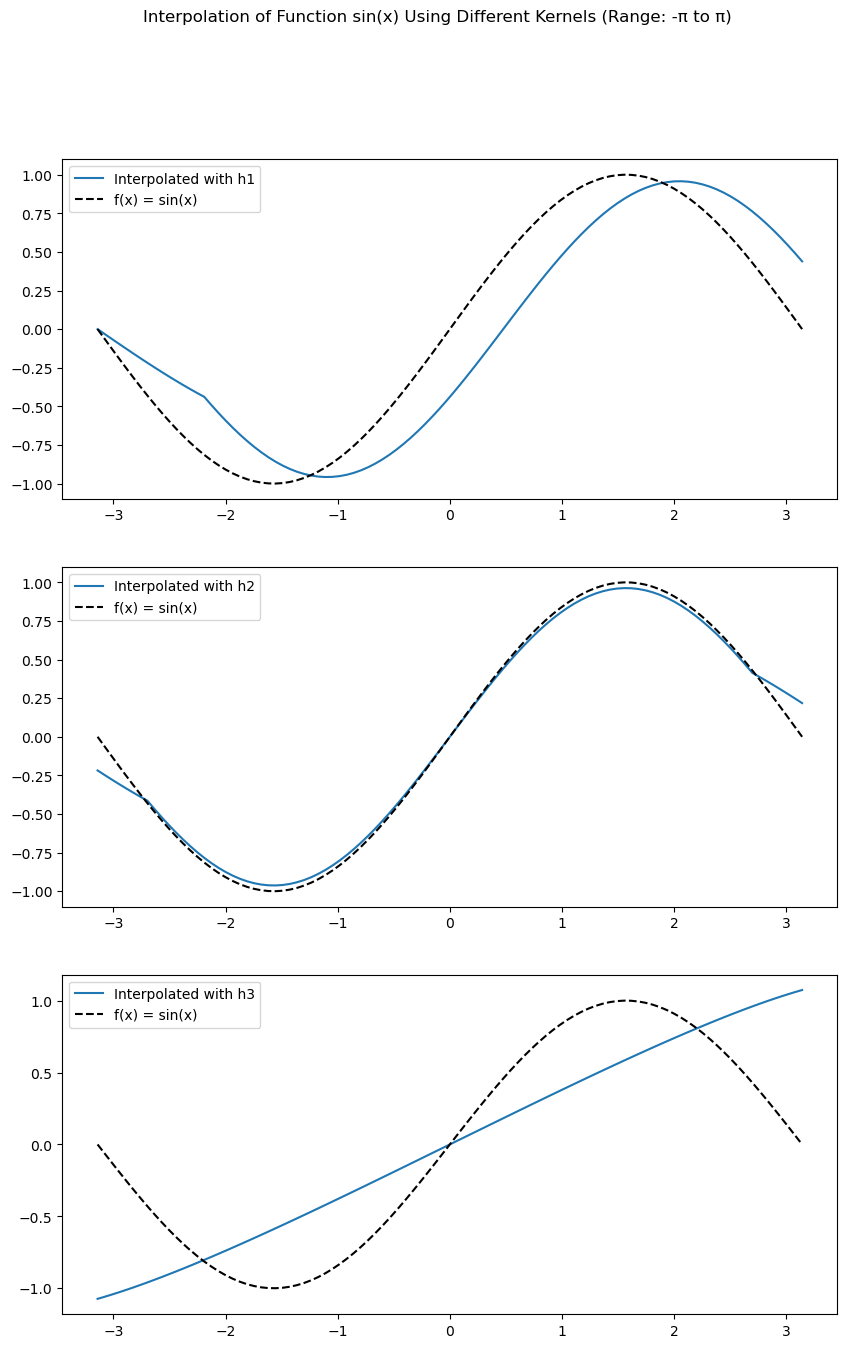

In [87]:
x_samples=np.linspace(-np.pi,np.pi,100)
x_range=np.linspace(-np.pi, np.pi,100)

y=simple_sin(x_samples)

y_interp_h1=[linear_interpolation(x_samples,y,x,h1) for x in x_range]
y_interp_h2=[linear_interpolation(x_samples,y,x,h2) for x in x_range]
y_interp_h3=[linear_interpolation(x_samples,y,x,h3) for x in x_range]

print(f"MSE for kernel h1: {metrics.mean_squared_error(y_pred=y_interp_h1, y_true=y):.10f}")
print(f"MSE for kernel h2: {metrics.mean_squared_error(y_pred=y_interp_h2, y_true=y):.10f}")
print(f"MSE for kernel h3: {metrics.mean_squared_error(y_pred=y_interp_h3, y_true=y):.10f}")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Interpolation of Function sin(x) Using Different Kernels (Range: -π to π)")

axs[0].plot(x_range, y_interp_h1, label="Interpolated with h1")
axs[0].plot(x_range, simple_sin(x_range), 'k--', label="f(x) = sin(x)")
axs[0].legend()

axs[1].plot(x_range, y_interp_h2, label="Interpolated with h2")
axs[1].plot(x_range, simple_sin(x_range), 'k--', label="f(x) = sin(x)")
axs[1].legend()

axs[2].plot(x_range, y_interp_h3, label="Interpolated with h3")
axs[2].plot(x_range, simple_sin(x_range), 'k--', label="f(x) = sin(x)")
axs[2].legend()

MSE for kernel h1: 0.1379030257
MSE for kernel h2: 0.0814306127
MSE for kernel h3: 0.2095658134


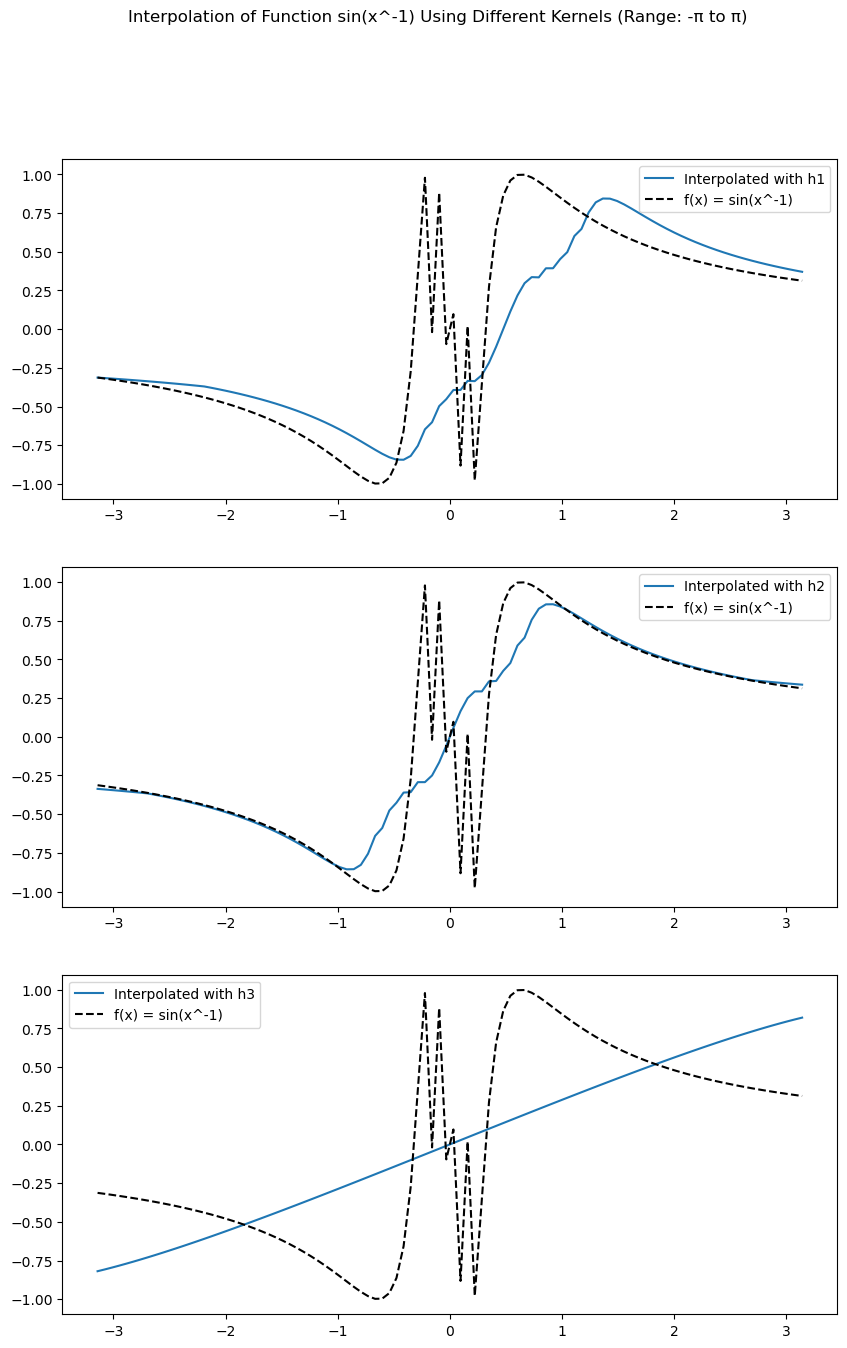

In [88]:
x_samples=np.linspace(-np.pi,np.pi,100)
x_range=np.linspace(-np.pi, np.pi,100)

y=inverterd_sin(x_samples)

y_interp_h1=[linear_interpolation(x_samples,y,x,h1) for x in x_range]
y_interp_h2=[linear_interpolation(x_samples,y,x,h2) for x in x_range]
y_interp_h3=[linear_interpolation(x_samples,y,x,h3) for x in x_range]

print(f"MSE for kernel h1: {metrics.mean_squared_error(y_pred=y_interp_h1, y_true=y):.10f}")
print(f"MSE for kernel h2: {metrics.mean_squared_error(y_pred=y_interp_h2, y_true=y):.10f}")
print(f"MSE for kernel h3: {metrics.mean_squared_error(y_pred=y_interp_h3, y_true=y):.10f}")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Interpolation of Function sin(x^-1) Using Different Kernels (Range: -π to π)")

axs[0].plot(x_range, y_interp_h1, label="Interpolated with h1")
axs[0].plot(x_range, inverterd_sin(x_range), 'k--', label="f(x) = sin(x^-1)")
axs[0].legend()

axs[1].plot(x_range, y_interp_h2, label="Interpolated with h2")
axs[1].plot(x_range, inverterd_sin(x_range), 'k--', label="f(x) = sin(x^-1)")
axs[1].legend()

axs[2].plot(x_range, y_interp_h3, label="Interpolated with h3")
axs[2].plot(x_range, inverterd_sin(x_range), 'k--', label="f(x) = sin(x^-1)")
axs[2].legend()

MSE for kernel h1: 0.7805140610
MSE for kernel h2: 1.1996255385
MSE for kernel h3: 0.9836133578


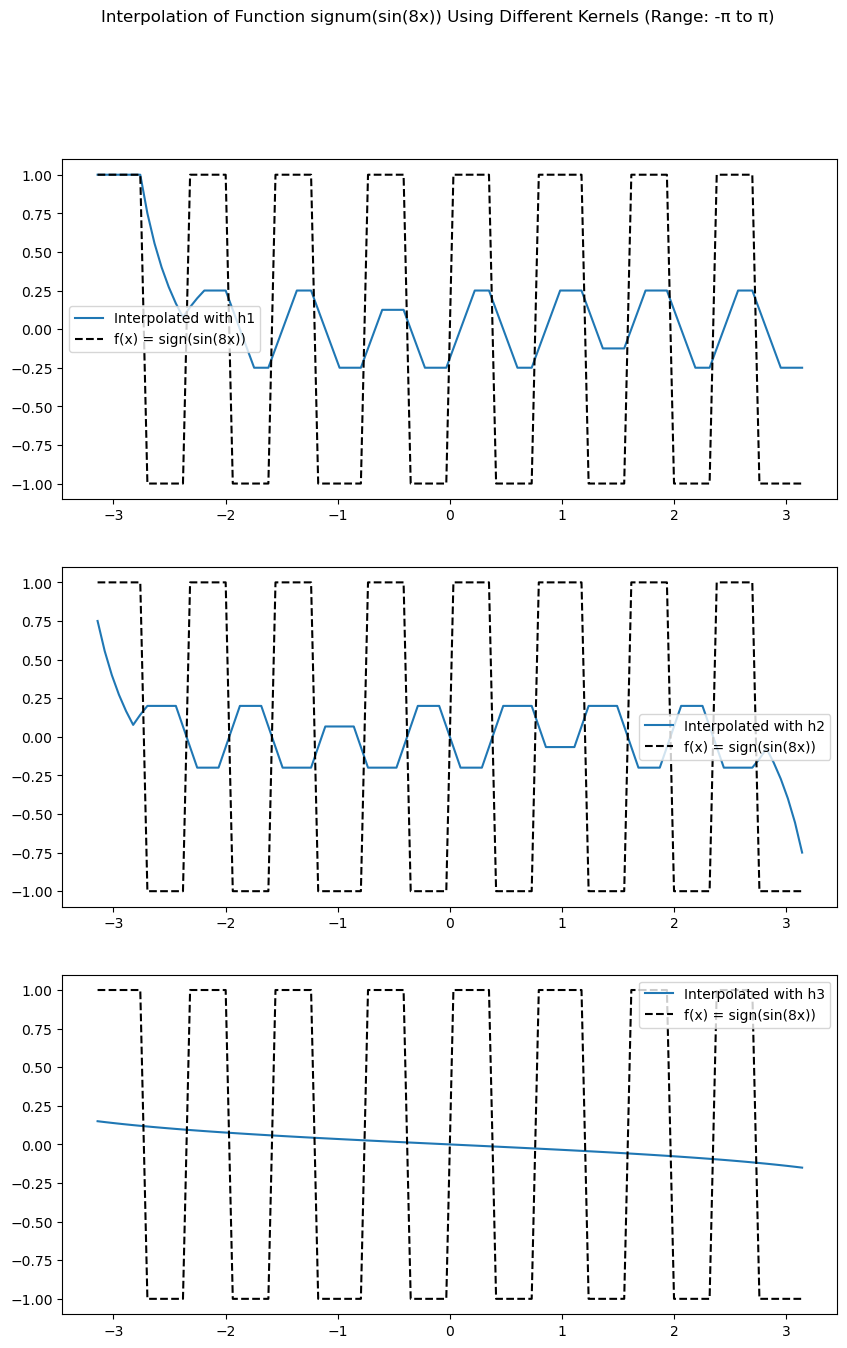

In [89]:
x_samples=np.linspace(-np.pi,np.pi,100)
x_range=np.linspace(-np.pi, np.pi,100)

y=singum(x_samples)

y_interp_h1=[linear_interpolation(x_samples,y,x,h1) for x in x_range]
y_interp_h2=[linear_interpolation(x_samples,y,x,h2) for x in x_range]
y_interp_h3=[linear_interpolation(x_samples,y,x,h3) for x in x_range]

print(f"MSE for kernel h1: {metrics.mean_squared_error(y_pred=y_interp_h1, y_true=y):.10f}")
print(f"MSE for kernel h2: {metrics.mean_squared_error(y_pred=y_interp_h2, y_true=y):.10f}")
print(f"MSE for kernel h3: {metrics.mean_squared_error(y_pred=y_interp_h3, y_true=y):.10f}")

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle("Interpolation of Function signum(sin(8x)) Using Different Kernels (Range: -π to π)")

axs[0].plot(x_range, y_interp_h1, label="Interpolated with h1")
axs[0].plot(x_range, singum(x_range), 'k--', label="f(x) = sign(sin(8x))")
axs[0].legend()

axs[1].plot(x_range, y_interp_h2, label="Interpolated with h2")
axs[1].plot(x_range, singum(x_range), 'k--', label="f(x) = sign(sin(8x))")
axs[1].legend()

axs[2].plot(x_range, y_interp_h3, label="Interpolated with h3")
axs[2].plot(x_range, singum(x_range), 'k--', label="f(x) = sign(sin(8x))")
axs[2].legend()